#Pre-processing and Training Data Development

The goals of this notebook are to:

1. Create dummies for categorical data ('pos', 'team')
2. create train_test_split
3. standardize the data

# Modeling goals:
1. Review the types of models that would be appropriate given your modeling response and the features in your dataset.
2. build two to three models and identify the best one.
3. implement both an entropy model and a Gini impurity model.
4. For hyperparameter tuning, think of methods like cross-validation
5. use standard model evaluation metrics such as accuracy, recall, precision, and F1.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load the nba_clean2 dataframe
url = 'https://github.com/smccracken13/NBA-All-Star-Prediction-Project/blob/main/Data/nba_clean2.csv?raw=true'
df = pd.read_csv(url)

Create dummy variables for categorical data

In [3]:
df.select_dtypes(exclude=['int','float']).dtypes

player    object
pos       object
tm        object
dtype: object

In [4]:
# value counts of teams
df['tm'].value_counts()

# value counts of teams for players that were all-stars
df[df['all_star']==1]['tm'].value_counts()

# I am going to drop the team column because I don't see it factoring into all_star selection.
# It was interesting however to see that Lakers are the most represented by quite a bit

LAL    51
SAS    41
UTA    34
HOU    33
PHO    33
PHI    28
BOS    24
GSW    24
DET    23
CHI    23
MIA    21
MIL    19
SEA    19
DAL    17
OKC    17
CLE    16
LAC    16
POR    16
ORL    16
NYK    14
MIN    14
DEN    13
SAC    13
ATL    12
IND    11
TOR     9
NJN     8
WAS     6
NOH     5
CHH     5
TOT     4
MEM     4
NOP     3
WSB     3
BRK     2
CHA     1
CHO     1
KCK     1
Name: tm, dtype: int64

In [5]:
# player and team will not be used in analysis but I would like to keep it for reference
reference_df = df[['season', 'player_id', 'player','tm']]
df = df.drop(['season', 'player_id', 'player','tm'],axis=1)
# drop weird extra columns (don't need this if I fix this issue earlier)
# set seas_id to index
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1)
df.set_index('seas_id')

,pos,experience,g,ts_percent,x3p_ar,f_tr,orb_percent,trb_percent,ast_percent,stl_percent,...,ast,stl,blk,tov,pf,pts,all_star,attend,tm_win_percent,seas_avg_attend
seas_id,,,,,,,,,,,,,,,,,,,,,
29646,PF,8,75,0.602,0.312,0.276,6.1,10.3,11.6,0.9,...,188,44.0,44.0,133.0,148,1126,0,695262.000000,0.585366,692948.753846
29647,SF,1,6,0.200,0.200,0.000,0.0,3.3,0.0,0.0,...,0,0.0,2.0,2.0,2,2,0,846867.000000,0.621951,692948.753846
29648,PG,4,63,0.544,0.305,0.201,2.6,6.5,20.7,2.0,...,153,42.0,9.0,67.0,92,400,0,692948.753846,0.500000,692948.753846
29649,PG,4,41,0.547,0.313,0.164,1.5,5.6,17.1,1.8,...,78,24.0,9.0,39.0,60,251,0,641499.000000,0.426829,692948.753846
29650,PG,4,22,0.538,0.290,0.266,4.6,8.2,27.4,2.4,...,75,18.0,0.0,28.0,32,149,0,663171.000000,0.780488,692948.753846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8343,C,12,82,0.545,0.003,0.328,11.2,18.5,15.6,1.0,...,366,65.0,61.0,153.0,249,794,0,588867.333333,0.475610,588867.333333
8344,SF,1,52,0.466,0.012,0.325,11.5,15.6,6.1,1.2,...,33,17.0,23.0,48.0,100,180,0,588867.333333,0.500000,588867.333333
8345,PG,4,62,0.442,0.225,0.165,5.4,6.1,29.3,3.2,...,259,75.0,1.0,95.0,110,299,0,588867.333333,0.451220,588867.333333


In [6]:
# Check categories for position
df['pos'].value_counts()

PF          4384
SG          4245
C           4163
PG          4149
SF          3926
SF-SG         40
SG-SF         33
PG-SG         33
SG-PG         32
PF-C          31
C-PF          31
PF-SF         31
SF-PF         24
SG-PF          4
SG-PG-SF       1
SF-C           1
PG-SF          1
Name: pos, dtype: int64

In [7]:
# one_hot_encode position
df = pd.get_dummies(df, columns=['pos'], prefix='Pos', drop_first=True)

In [8]:
df.columns

Index(['seas_id', 'experience', 'g', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm',
       'dbpm', 'vorp', 'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'all_star', 'attend',
       'tm_win_percent', 'seas_avg_attend', 'Pos_C-PF', 'Pos_PF', 'Pos_PF-C',
       'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SF', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-C',
       'Pos_SF-PF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PF', 'Pos_SG-PG',
       'Pos_SG-PG-SF', 'Pos_SG-SF'],
      dtype='object')

In [9]:
df.head().T

,0,1,2,3,4
seas_id,29646.000000,29647.000000,29648.000000,29649.000000,29650.000000
experience,8.000000,1.000000,4.000000,4.000000,4.000000
g,75.000000,6.000000,63.000000,41.000000,22.000000
ts_percent,0.602000,0.200000,0.544000,0.547000,0.538000
x3p_ar,0.312000,0.200000,0.305000,0.313000,0.290000
f_tr,0.276000,0.000000,0.201000,0.164000,0.266000
orb_percent,6.100000,0.000000,2.600000,1.500000,4.600000
trb_percent,10.300000,3.300000,6.500000,5.600000,8.200000
ast_percent,11.600000,0.000000,20.700000,17.100000,27.400000
stl_percent,0.900000,0.000000,2.000000,1.800000,2.400000


Split into Train and Test sets

In [10]:
# Create train_test_split
X=df.loc[:, df.columns != 'all_star']
y=df['all_star']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

Standardize the data

In [11]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Fit scaler to the training data
scaler.fit(X_train)

# Transform the train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Modeling goals:
1. Review the types of models that would be appropriate given your modeling response and the features in your dataset.

2. build two to three models and identify the best one.

3. implement both an entropy model and a Gini impurity model.

4. For hyperparameter tuning, think of methods like cross-validation

5. use standard model evaluation metrics such as accuracy, recall, precision, and F1.

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
# create function to output classification reports and confusion matrixes
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot()
    plt.show()

BASIC RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4122
           1       0.80      0.74      0.77       104

    accuracy                           0.99      4226
   macro avg       0.90      0.87      0.88      4226
weighted avg       0.99      0.99      0.99      4226



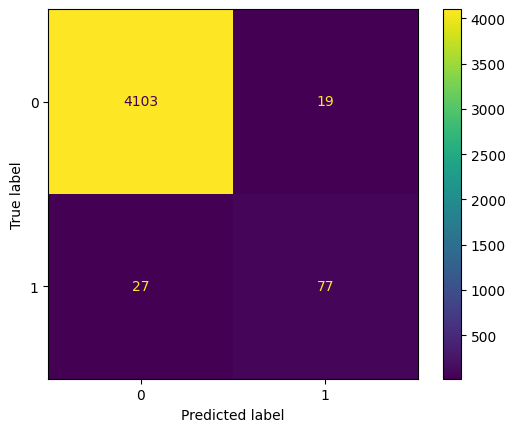

In [14]:
# this is a basic RandomForestClassifier attempt with no tuning
basic_RFC = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
basic_RFC.fit(X_train, y_train)

print("BASIC RANDOM FOREST CLASSIFIER")
report(basic_RFC)

In [15]:
# Using RandomSearchCV to tune hyperparameters for RandomForestClassifier
# Took example from here: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [16]:
# Use the random grid to search for best hyperparameters (takes 56 min)
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# A note from my mentor: n_iter argument (100 is too high, maybe 50)

#uncomment to run grid search
#RFC_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RFC_random.fit(X_train, y_train)

NameError: ignored

In [ ]:
RFC_random.best_params_

In [ ]:
# Run Random Forest Classifier with best hyperparameters
tuned_RFC = RFC_random.best_estimator_
tuned_RFC.fit(X_train, y_train)

print("TUNED RANDOM FOREST CLASSIFIER")
report(tuned_RFC)

TUNED RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4122
           1       0.79      0.73      0.76       104

    accuracy                           0.99      4226
   macro avg       0.89      0.86      0.88      4226
weighted avg       0.99      0.99      0.99      4226



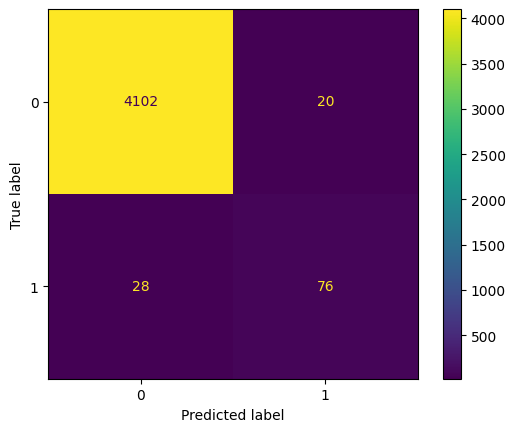

In [17]:
# These were best parameters from 100 n_iter randomsearchCV
RFC3 = RandomForestClassifier(n_estimators=1400, random_state = 1,n_jobs=-1,
                              min_samples_split= 2,
                              min_samples_leaf= 4,
                              max_features= 'sqrt',
                              max_depth= 80,
                              bootstrap= False)
RFC3.fit(X_train, y_train)

print("TUNED RANDOM FOREST CLASSIFIER")
report(RFC3)

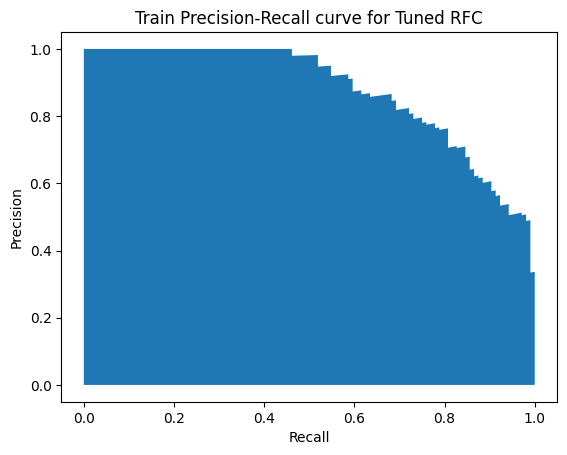

In [18]:
from sklearn.metrics import precision_recall_curve
# y_pred, needs to be probability (check documentation)
y_score = RFC3.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve for Tuned RFC");

My next model will be Logistic Regression, but first I need to deal with class imbalance. I will refer to this article:

https://heartbeat.comet.ml/dealing-with-imbalanced-data-226dc84589c8

In [19]:
# Use SMOTE and Tomek to undersample non all-stars and oversample all-stars
from imblearn.combine import SMOTETomek
smt= SMOTETomek()
X_res, y_res= smt.fit_resample(X_train, y_train)

# LOGISTIC REGRESSION

In [ ]:
##build baseline logistic regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='saga')
lr_model.fit(X_res, y_res)

In [ ]:
print("BASIC LOGISTIC REGRESSION MODEL")
report(lr_model)

In [ ]:
# Use the random grid to search for best hyperparameters
from scipy.stats import uniform
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200, random_state=1)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = lr, param_distributions=distributions, random_state=1, n_jobs = -1)
# Fit the random search model
lr_model_tuned = lr_random.fit(X_train, y_train)
lr_model_tuned.best_params_

In [ ]:
# Run Logistic Regression with best hyperparameters
tuned_lr = LogisticRegression(solver='saga',C=3.730229437354635, penalty='l1')
tuned_lr.fit(X_res, y_res)


print("TUNED LOGISTIC REGRESSION MODEL")
report(tuned_lr)

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
# fit to resampled data
NB.fit(X_res, y_res)

print("BASIC NAIVE BAYES MODEL")
report(NB)

In [ ]:
# What hyperparameter tuning should I do for Naive Bayes?
# https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
from sklearn.model_selection import GridSearchCV
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_res, y_res)
print(nbModel_grid.best_estimator_)

In [ ]:
tuned_NB = GaussianNB(var_smoothing=1.0)
tuned_NB.fit(X_res, y_res)

print("TUNED NAIVE BAYES MODEL")
report(tuned_NB)

# SVM


In [ ]:
from sklearn import svm
SVM = svm.SVC(kernel= 'linear', random_state=1, C=0.1)
SVM.fit(X_res, y_res)

print("BASIC SVM MODEL")
report(SVM)

In [ ]:
# Hyperparameter tuning for SVM
# https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb

from sklearn.model_selection import StratifiedKFold

# List of C values
C_range = np.logspace(-1, 1, 3)
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)

# Define the search space
param_grid = { "C": C_range, "kernel": ['rbf', 'poly'], "gamma": gamma_range.tolist()+['scale', 'auto']
              }
# Set up score
scoring = ['accuracy']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

# Define grid search

#uncomment to run grid search
##grid_search = GridSearchCV(estimator= svm.SVC(), 
                           param_grid=param_grid, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_res, y_res)
# Print grid search summary
print(grid_result)

In [ ]:
print(grid_result.best_estimator_)

In [ ]:
# Run Tuned SVM model
tuned_SVM = svm.SVC(C=10.0, gamma=0.1, random_state=1)
tuned_SVM.fit(X_res, y_res)

print("TUNED SVM MODEL")
report(tuned_SVM)

The basic Random Forest Classifier (with 300 estimators) performed the best with a macro F1 score of 0.88. It made 1 more correct prediction that the other two Random Forest Classifiers.

I wonder if there was a way to do the resampling more effectively, because the RFC was the only model that did not rely on resampled data, and it performed the best.

# Predict 2023 All Stars

In [20]:
# load cleaned 2023 data
df_2023 = pd.read_csv('https://github.com/smccracken13/NBA-All-Star-Prediction-Project/raw/main/NBA%202023%20Data/nba_2023_clean.csv')

In [33]:
X.columns

Index(['seas_id', 'experience', 'g', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm',
       'dbpm', 'vorp', 'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'attend',
       'tm_win_percent', 'seas_avg_attend', 'Pos_C-PF', 'Pos_PF', 'Pos_PF-C',
       'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SF', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-C',
       'Pos_SF-PF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PF', 'Pos_SG-PG',
       'Pos_SG-PG-SF', 'Pos_SG-SF'],
      dtype='object')

In [24]:
df_2023.columns

Index(['Unnamed: 0', 'seas_id', 'experience', 'g', 'ts_percent', 'x3p_ar',
       'f_tr', 'orb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm',
       'dbpm', 'vorp', 'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'attend',
       'tm_win_percent', 'seas_avg_attend', 'Pos_PF', 'Pos_PF-SF', 'Pos_PG',
       'Pos_SF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PG'],
      dtype='object')

In [25]:
# find missing columns from my 2023 data
s = set(df_2023.columns)
missing_col = [x for x in X.columns if x not in s]
missing_col

['Pos_C-PF',
 'Pos_PF-C',
 'Pos_PG-SF',
 'Pos_PG-SG',
 'Pos_SF-C',
 'Pos_SF-PF',
 'Pos_SG-PF',
 'Pos_SG-PG-SF',
 'Pos_SG-SF']

In [28]:
df_2023.drop(columns='Unnamed: 0', inplace=True)

In [29]:
df_2023[['Pos_C-PF',
 'Pos_PF-C',
 'Pos_PG-SF',
 'Pos_PG-SG',
 'Pos_SF-C',
 'Pos_SF-PF',
 'Pos_SG-PF',
 'Pos_SG-PG-SF',
 'Pos_SG-SF']]=0

In [31]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 49 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seas_id          678 non-null    int64  
 1   experience       678 non-null    int64  
 2   g                678 non-null    int64  
 3   ts_percent       678 non-null    float64
 4   x3p_ar           678 non-null    float64
 5   f_tr             678 non-null    float64
 6   orb_percent      678 non-null    float64
 7   trb_percent      678 non-null    float64
 8   ast_percent      678 non-null    float64
 9   stl_percent      678 non-null    float64
 10  blk_percent      678 non-null    float64
 11  tov_percent      678 non-null    float64
 12  usg_percent      678 non-null    float64
 13  dws              678 non-null    float64
 14  ws_48            678 non-null    float64
 15  obpm             678 non-null    float64
 16  dbpm             678 non-null    float64
 17  vorp            

In [34]:
model_col = ['seas_id', 'experience', 'g', 'ts_percent', 'x3p_ar', 'f_tr',
       'orb_percent', 'trb_percent', 'ast_percent', 'stl_percent',
       'blk_percent', 'tov_percent', 'usg_percent', 'dws', 'ws_48', 'obpm',
       'dbpm', 'vorp', 'x3p', 'x3p_percent', 'x2p_percent', 'ft', 'ft_percent',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'attend',
       'tm_win_percent', 'seas_avg_attend', 'Pos_C-PF', 'Pos_PF', 'Pos_PF-C',
       'Pos_PF-SF', 'Pos_PG', 'Pos_PG-SF', 'Pos_PG-SG', 'Pos_SF', 'Pos_SF-C',
       'Pos_SF-PF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PF', 'Pos_SG-PG',
       'Pos_SG-PG-SF', 'Pos_SG-SF']
df_2023 = df_2023[model_col]

In [36]:
# fit basic_RFC model
basic_RFC = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
basic_RFC.fit(X, y)
y_pred_2023 = basic_RFC.predict(df_2023)
#print(y_pred_2023[y_pred_2023['all_star']==1])

In [38]:
df_2023['pred'] = y_pred_2023

<ipython-input-38-bb84134005f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['pred'] = y_pred_2023


In [40]:
df_2023[df_2023['pred']==1]['seas_id']

24     30482
103    30561
155    30613
157    30615
207    30665
236    30694
267    30725
291    30749
301    30759
306    30764
347    30805
415    30873
422    30880
506    30964
588    31046
598    31056
Name: seas_id, dtype: int64

In [41]:
player_names_2023 = pd.read_csv('https://github.com/smccracken13/NBA-All-Star-Prediction-Project/blob/main/NBA%202023%20Data/Player%20Totals.csv?raw=true')

In [48]:
seas_ids = [30482, 30561, 30613, 30615, 30665, 30694, 30725,30749, 30759, 30764, 30805, 30873, 30880, 30964, 31046, 31056]
all_stars_2023 = []
for id in seas_ids:
  player = player_names_2023[player_names_2023.seas_id==id]['player']
  all_stars_2023.append(player)
print(all_stars_2023)

[24    Anthony Davis
Name: player, dtype: object, 103    Damian Lillard
Name: player, dtype: object, 155    Domantas Sabonis
Name: player, dtype: object, 157    Donovan Mitchell
Name: player, dtype: object, 207    Giannis Antetokounmpo
Name: player, dtype: object, 236    Ja Morant
Name: player, dtype: object, 267    James Harden
Name: player, dtype: object, 291    Jayson Tatum
Name: player, dtype: object, 301    Jimmy Butler
Name: player, dtype: object, 306    Joel Embiid
Name: player, dtype: object, 347    Julius Randle
Name: player, dtype: object, 415    LeBron James
Name: player, dtype: object, 422    Luka Dončić
Name: player, dtype: object, 506    Nikola Jokić
Name: player, dtype: object, 588    Shai Gilgeous-Alexander
Name: player, dtype: object, 598    Stephen Curry
Name: player, dtype: object]


In [ ]:
# over estimates = Davis, Harden, Butler
# under estimates = Markkanen, Irving, Brown, George, Haliburton, Jackson Jr., Holiday, Adebayo, DeRozan, Durant, Williamson
# replacements =  Siakam, Edwards, Fox